# Imports and Loading in the DTM


In [ ]:
import os

In [ ]:
import matplotlib
if matplotlib.__version__ != "3.1.3":
    !pip uninstall -y matplotlib
    !pip install matplotlib==3.1.3
    os.kill(os.getpid(), 9)

In [ ]:
try:
  import tmtoolkit
except:
  !pip install tmtoolkit
  os.kill(os.getpid(), 9)

In [ ]:
try:
  from tmtoolkit.topicmod.tm_lda import compute_models_parallel
except: 
  !pip install tmtoolkit['lda']
  from tmtoolkit.topicmod.tm_lda import compute_models_parallel

In [ ]:
try:
  from lda import LDA
except: 
  !pip install lda
  from lda import LDA

In [ ]:
import scipy.sparse
import pickle
import logging
import warnings
import random
random.seed(20191120) 

In [ ]:
working_directory = '/content/drive/MyDrive/MSDS_marketing_text_analytics/master_files/2_topic_modeling'

doc_labels = pickle.load(open('%s/doc_labels.p' % working_directory, 'rb'))

vocab_sm = scipy.sparse.load_npz('%s/small_dtm.npz' % working_directory)
vocab_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory)

vocab_bg = pickle.load(open('%s/big_vocab.p' % working_directory, 'rb'))
vocab_sm = pickle.load(open('%s/small_vocab.p' % working_directory, 'rb'))

dtm_sm = scipy.sparse.load_npz('%s/small_dtm.npz' % working_directory)
dtm_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory)

In [ ]:
# suppress the "INFO" messages and warnings from lda
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

# Eval

In [ ]:
const_params = {'n_iter': 500,'eta': 0.1, 'random_state': 20191122  }
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 774.9565646564073, 'coherence_mimno_2011': -1.9339646563152362}), (6, {'cao_juan_2009': 0.5519749522136317, 'arun_2010': 574.5386421204961, 'coherence_mimno_2011': -2.1316400121360903}), (11, {'cao_juan_2009': 0.484479413361454, 'arun_2010': 504.7794587969394, 'coherence_mimno_2011': -2.2119869241579173}), (16, {'cao_juan_2009': 0.45050611960129455, 'arun_2010': 456.7661000917852, 'coherence_mimno_2011': -2.226766510967188}), (21, {'cao_juan_2009': 0.43328504082582125, 'arun_2010': 429.05600396677085, 'coherence_mimno_2011': -2.2415035246270856}), (26, {'cao_juan_2009': 0.41181733248374613, 'arun_2010': 399.31979249480594, 'coherence_mimno_2011': -2.2784376868877256}), (31, {'cao_juan_2009': 0.3934945190670304, 'arun_2010': 381.50798024933624, 'coherence_mimno_2011': -2.32032536976994}), (36, {'cao_juan_2009': 0.38253576465688505, 'arun_2010': 364.4418193780229, 'coherence_mimno_2011': -2.344988815414515}), (41, {'cao_juan_2009': 0.3732371607789

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2b9e8b4d0>,
       dtype=object))

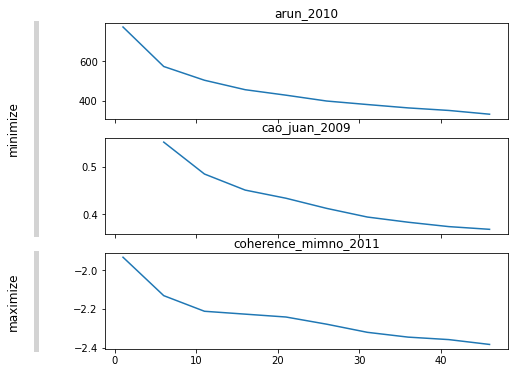

In [ ]:
plot_eval_results(results_by_n_topics)

# Eval (lower beta)

In [ ]:
const_params = {'n_iter': 500,'eta': 0.01, 'random_state': 20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 774.9505078007719, 'coherence_mimno_2011': -1.9339646563152362}), (6, {'cao_juan_2009': 0.5464463155631122, 'arun_2010': 572.7204115968432, 'coherence_mimno_2011': -2.1219495876376278}), (11, {'cao_juan_2009': 0.4748392844452876, 'arun_2010': 501.42299930874816, 'coherence_mimno_2011': -2.2336301964450174}), (16, {'cao_juan_2009': 0.4519562261075472, 'arun_2010': 463.48055821644334, 'coherence_mimno_2011': -2.2686461298356013}), (21, {'cao_juan_2009': 0.41976389562623, 'arun_2010': 422.9282438203182, 'coherence_mimno_2011': -2.295827829297563}), (26, {'cao_juan_2009': 0.3956810598055505, 'arun_2010': 395.1953541586923, 'coherence_mimno_2011': -2.2981412161381236}), (31, {'cao_juan_2009': 0.3821584676196466, 'arun_2010': 374.95319470953285, 'coherence_mimno_2011': -2.3352919035247637}), (36, {'cao_juan_2009': 0.36909357542065, 'arun_2010': 363.9548289646989, 'coherence_mimno_2011': -2.3558640402158684}), (41, {'cao_juan_2009': 0.35614389780882877

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2b99e06d0>,
       dtype=object))

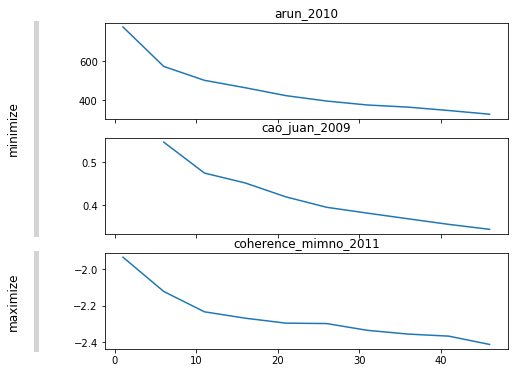

In [ ]:
plot_eval_results(results_by_n_topics)

# Eval (higher beta)

In [ ]:
const_params = {'n_iter': 500,'eta': 0.5, 'random_state': 20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 774.9834720493909, 'coherence_mimno_2011': -1.9339646563152362}), (6, {'cao_juan_2009': 0.5586798907360334, 'arun_2010': 575.7080443857078, 'coherence_mimno_2011': -2.1139245464562415}), (11, {'cao_juan_2009': 0.5010140996952442, 'arun_2010': 503.58231190723393, 'coherence_mimno_2011': -2.2108564499980727}), (16, {'cao_juan_2009': 0.4602387992576635, 'arun_2010': 461.1203729330677, 'coherence_mimno_2011': -2.2057655674010457}), (21, {'cao_juan_2009': 0.4346536937698122, 'arun_2010': 424.2999005988556, 'coherence_mimno_2011': -2.2175239509866285}), (26, {'cao_juan_2009': 0.43886159156585075, 'arun_2010': 411.2925585922459, 'coherence_mimno_2011': -2.263980767722871}), (31, {'cao_juan_2009': 0.4065707322494205, 'arun_2010': 384.04088489734687, 'coherence_mimno_2011': -2.236396518622388}), (36, {'cao_juan_2009': 0.4028056885522052, 'arun_2010': 372.998939530046, 'coherence_mimno_2011': -2.334851470121099}), (41, {'cao_juan_2009': 0.3976267820177424

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2b9475a10>,
       dtype=object))

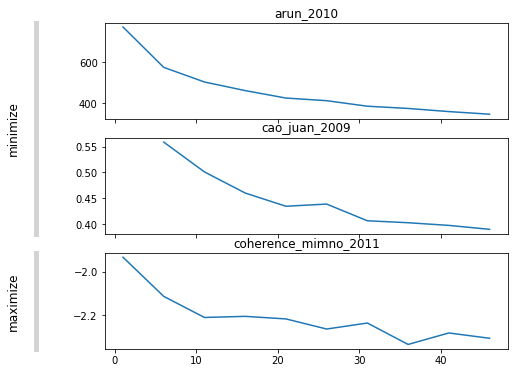

In [ ]:
plot_eval_results(results_by_n_topics)

# Eval (lower alpha)

In [ ]:
const_params = {'n_iter': 500,'eta': 0.1, 'random_state': 20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(10*k)) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.1}, {'n_topics': 6, 'alpha': 0.016666666666666666}, {'n_topics': 11, 'alpha': 0.00909090909090909}, {'n_topics': 16, 'alpha': 0.00625}, {'n_topics': 21, 'alpha': 0.004761904761904762}, {'n_topics': 26, 'alpha': 0.0038461538461538464}, {'n_topics': 31, 'alpha': 0.0032258064516129032}, {'n_topics': 36, 'alpha': 0.002777777777777778}, {'n_topics': 41, 'alpha': 0.0024390243902439024}, {'n_topics': 46, 'alpha': 0.002173913043478261}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 774.9565646564073, 'coherence_mimno_2011': -1.9339646563152362}), (6, {'cao_juan_2009': 0.7693875248191261, 'arun_2010': 624.9599055333816, 'coherence_mimno_2011': -2.0231600744274005}), (11, {'cao_juan_2009': 0.7284047408280113, 'arun_2010': 571.7503048989864, 'coherence_mimno_2011': -2.0557818041777884}), (16, {'cao_juan_2009': 0.7263654871863319, 'arun_2010': 538.7547343425701, 'coherence_mimno_2011': -2.076633673977605}), (21, {'cao_juan_2009': 0.7112692371321341, 'arun_2010': 512.3899583609629, 'coherence_mimno_2011': -2.1422295109255733}), (26, {'cao_juan_2009': 0.6945717339704197, 'arun_2010': 483.461402576212, 'coherence_mimno_2011': -2.1358002100432367}), (31, {'cao_juan_2009': 0.7007891099551866, 'arun_2010': 472.3801121549276, 'coherence_mimno_2011': -2.0947296232820767}), (36, {'cao_juan_2009': 0.6798269375912233, 'arun_2010': 447.7557449965773, 'coherence_mimno_2011': -2.138044768285054}), (41, {'cao_juan_2009': 0.6793528888103288, 

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2b9378410>,
       dtype=object))

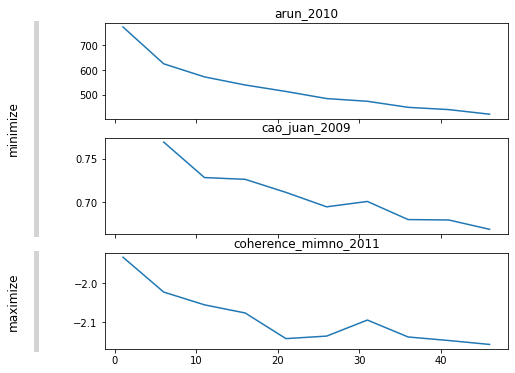

In [ ]:
plot_eval_results(results_by_n_topics)